### Import packages

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [39]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Ligue_1_match_details/'
file_list = os.listdir(path)

Ligue_1_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Ligue_1_matches = pd.concat([Ligue_1_matches, pd.read_json(filepath, lines=True)], axis=0)

In [40]:
Ligue_1_matches.head(5)

,match_general_info,team_details,event_details
0,"{'day': 'Sat', 'date': '8/7/10', 'starttime': ...","{'home': {'name': 'AJ Auxerre', 'rank': '7', '...",{'home': {'goal': [{'scorer': 'Benoît Pedretti...
1,"{'day': 'Sat', 'date': '8/7/10', 'starttime': ...","{'home': {'name': 'RC Lens', 'rank': '16', 'st...",{'home': {'goal': [{'scorer': 'Toifilou Maouli...
2,"{'day': 'Sat', 'date': '8/7/10', 'starttime': ...","{'home': {'name': 'Olympique Lyon', 'rank': '1...","{'home': {'card': [{'name': 'Maxime Gonalons',..."
3,"{'day': 'Sat', 'date': '8/7/10', 'starttime': ...","{'home': {'name': 'Olympique Marseille', 'rank...",{'home': {'goal': [{'scorer': 'Mamadou Samassa...
4,"{'day': 'Sat', 'date': '8/7/10', 'starttime': ...","{'home': {'name': 'OGC Nice', 'rank': '12', 's...","{'home': {'card': [{'name': 'Renato Civelli', ..."


In [41]:
print('number of matches from season 2010-2011 to the date the data scraped:', len(Ligue_1_matches))

number of matches from season 2010-2011 to the date the data scraped: 4881


### Match general information analysis
#### 1. Observe initial form

In [42]:
match_general_info = pd.DataFrame(Ligue_1_matches['match_general_info'].to_list())

In [43]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Sat,8/7/10,9:00 PM,Stade de l'Abbé-Deschamps,8.958,Bruno Coué,2:2
1,Sat,8/7/10,9:00 PM,Stade Bollaert-Delelis,31.392,Ruddy Buquet,1:2
2,Sat,8/7/10,9:00 PM,Stade de Gerland,35.275,Lionel Jaffredo,0:0
3,Sat,8/7/10,9:00 PM,Orange Vélodrome,55.790,Alexandre Castro,1:2
4,Sat,8/7/10,9:00 PM,Stade du Ray,7.833,Laurent Duhamel,0:0


In [44]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 0
stadium 0
attendance 335
referee 0
score 0


Attendance data need to be observed after converting string type date to datetype date to check why there are many null values.

#### 2. Data pre-processing

In [45]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [46]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Sat,2010-08-07,21:00:00,Stade de l'Abbé-Deschamps,8.958,Bruno Coué,2:2,2,2
1,Sat,2010-08-07,21:00:00,Stade Bollaert-Delelis,31.392,Ruddy Buquet,1:2,1,2
2,Sat,2010-08-07,21:00:00,Stade de Gerland,35.275,Lionel Jaffredo,0:0,0,0
3,Sat,2010-08-07,21:00:00,Orange Vélodrome,55.790,Alexandre Castro,1:2,1,2
4,Sat,2010-08-07,21:00:00,Stade du Ray,7.833,Laurent Duhamel,0:0,0,0


In [47]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
928,Wed,2012-12-12,21:00:00,Stade Armand-Cesari,None,Said Ennjimi,1:2,1,2
1153,Sat,2013-08-17,20:00:00,Stade du Ray,None,Antony Gautier,2:1,2,1
1160,Fri,2013-08-23,20:30:00,Stade Louis-II,None,Philippe Kalt,0:0,0,0
1293,Wed,2013-12-04,19:00:00,Stade François-Coty,None,Alexandre Castro,1:1,1,1
1801,Fri,2015-03-13,20:30:00,Allianz Riviera,None,Benoît Millot,1:2,1,2
...,...,...,...,...,...,...,...,...,...
4234,Sun,2021-11-28,20:45:00,Orange Vélodrome,None,Jérémie Pignard,1:0,1,0
4241,Wed,2021-12-01,21:00:00,Groupama Stadium,None,Benoît Millot,1:2,1,2
4275,Fri,2022-01-07,21:00:00,Matmut Atlantique,None,Eric Wattellier,0:1,0,1
4284,Wed,2022-01-26,19:00:00,Stade Raymond Kopa,None,Clément Turpin,0:1,0,1


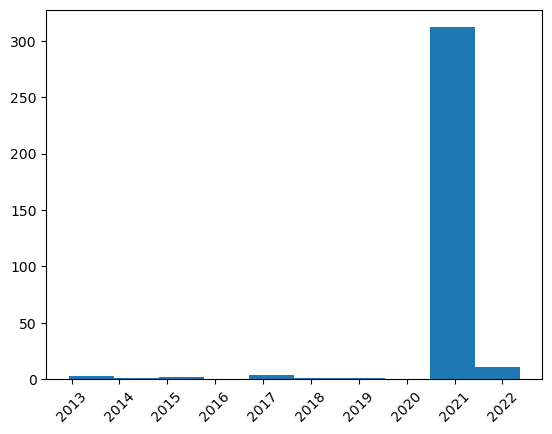

In [48]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most of null cases for the attendance locate season 2020-2021, and it could be because of the pendemic. <br>
There were many games with no attendance during the pendamic, so 0 will replace null values for attendance. <br>
For other cases, average number of attendance for the stadium will replace null values.

Null value attendance of matches bewtween 05.01.2020 and 07.01.2021 will be replaced with 0.

In [49]:
match_general_info.loc[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01'), 'attendance'] = \
    match_general_info[(match_general_info['date']<='2021-07-01') & (match_general_info['date']>='2020-05-01')]['attendance'].fillna('0')
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

,date,stadium
928,2012-12-12,Stade Armand-Cesari
1153,2013-08-17,Stade du Ray
1160,2013-08-23,Stade Louis-II
1293,2013-12-04,Stade François-Coty
1801,2015-03-13,Allianz Riviera
1813,2015-03-21,Stade Armand-Cesari
2439,2017-04-05,Stade Saint-Symphorien
2618,2017-04-23,Stade Geoffroy-Guichard
2623,2017-04-29,Stade Parsemain
2644,2017-05-14,Stade Parsemain


In [50]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        print('cannot find an average, missing value filled out manually:', stadium)
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(15000)) 

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

cannot find an average, missing value filled out manually: Stade Parsemain


In [51]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2012-12-12 12100
2013-08-17 9408
2013-08-23 7166
2013-12-04 6737
2015-03-13 18916
2015-03-21 12100
2017-04-05 13965
2017-04-23 24599
2017-04-29 15000
2017-05-14 15000
2018-04-01 31806
2019-02-05 43844
2021-08-28 18916
2021-09-19 18916
2021-09-22 25535
2021-10-01 25535
2021-11-07 24599
2022-02-01 38249
2021-11-28 43844
2021-12-01 38249
2022-01-07 20789
2022-01-26 9554
2022-05-14 24599


As we can see above, missing attendance of matches after 07.01.2021 (no pendamic period) are filled with averages.

In [52]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 0
score 0
home_score 0
away_score 0


Now, we don't have null values anymore.

#### 3. Data Quality Check - Check if there are inappropriate values
##### - categorical data

In [53]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,4881,4881,4881,4881,4881
unique,7,29,45,69,49
top,Sat,20:00:00,Orange Vélodrome,Ruddy Buquet,1:1
freq,2205,1122,244,260,653


In [54]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,4881
mean,2016-12-27 04:15:29.317762816
min,2010-08-07 00:00:00
25%,2013-10-04 00:00:00
50%,2016-12-10 00:00:00
75%,2020-02-08 00:00:00
max,2023-09-03 00:00:00


In [55]:
match_general_info['day'].value_counts(dropna=False)

Sat    2205
Sun    1808
Wed     380
Fri     377
Tue      80
Thu      16
Mon      15
Name: day, dtype: int64

In [56]:
match_general_info['date'].value_counts(dropna=False)

2022-05-21    10
2012-05-13    10
2017-05-20    10
2017-12-20    10
2023-01-11    10
              ..
2012-05-10     1
2020-11-21     1
2018-09-28     1
2012-05-01     1
2017-03-03     1
Name: date, Length: 1352, dtype: int64

In [57]:
match_general_info['starttime'].value_counts(dropna=False)

20:00:00    1122
21:00:00    1019
17:00:00     804
19:00:00     647
15:00:00     532
20:45:00     221
14:00:00     133
20:30:00     120
13:00:00     103
17:05:00      59
17:30:00      27
18:30:00      23
20:50:00      20
21:05:00      15
16:30:00       6
16:00:00       6
19:30:00       4
14:30:00       3
17:15:00       3
21:15:00       3
18:45:00       2
18:00:00       2
18:55:00       1
17:10:00       1
15:05:00       1
16:45:00       1
00:00:00       1
13:30:00       1
12:45:00       1
Name: starttime, dtype: int64

In [58]:
match_general_info['stadium'].value_counts(dropna=False)

Orange Vélodrome                       244
Parc des Princes                       244
Roazhon Park                           244
Stade de la Mosson                     240
Stade Geoffroy-Guichard                224
Matmut Atlantique                      219
Decathlon Arena-Stade Pierre-Mauroy    208
Stade Louis-II                         206
Stadium Municipal                      206
Stade du Moustoir                      192
Stade de la Beaujoire                  188
Allianz Riviera                        186
Stade Auguste-Delaune                  167
Stade Raymond Kopa                     149
Groupama Stadium                       139
Stade Michel-d'Ornano                  131
Stade Francis-Le Blé                   130
Stade du Roudourou                     115
Stade Saint-Symphorien                 111
Stade de la Meinau                     110
Stade Gaston-Gérard                    109
Stade de Gerland                       104
Stade de l'Aube                         95
Stade Arman

In [59]:
match_general_info['referee'].value_counts(dropna=False)

Ruddy Buquet        260
Clément Turpin      234
Benoît Bastien      226
Benoît Millot       224
Antony Gautier      222
                   ... 
Alban Hung            1
Romain Delpech        1
Alejandro Castro      1
Bastien Courbet       1
Miguel Nogueira       1
Name: referee, Length: 69, dtype: int64

##### - numerical data


In [60]:
match_general_info.describe()

,attendance,home_score,away_score
count,4881.000000,4881.000000,4881.000000
mean,19780.719320,1.466503,1.125794
std,13375.484927,1.244230,1.106312
min,0.000000,0.000000,0.000000
25%,11249.000000,1.000000,0.000000
50%,15912.000000,1.000000,1.000000
75%,26686.000000,2.000000,2.000000
max,70785.000000,9.000000,9.000000
